In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Домашнее задание к лекции 4.2 «Визуализация данных»

In [2]:
source_directory = 'names'

In [4]:
names_by_year = {}
for year in range(1900, 2001, 1):
    files_path = os.path.join(source_directory, 'yob%s.txt' % str(year))
    names_by_year[year] = pd.read_csv(
        files_path,
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [5]:
names_all.head()

Name Gender  Count
Year Pos                        
1900 0        Mary      F  16707
     1       Helen      F   6343
     2        Anna      F   6114
     3    Margaret      F   5304
     4        Ruth      F   4765

#### Построить график изменения количества имен Ruth и Robert с 1900 по 2000

In [6]:
years = list(range(1900, 2001))
name_count = {
    'Ruth': [],
    'Robert': []
}
for year in years:
    data = names_by_year[year]
    name_count['Ruth'].append(data[data.Name == 'Ruth'].Count.sum())
    name_count['Robert'].append(data[data.Name == 'Robert'].Count.sum())

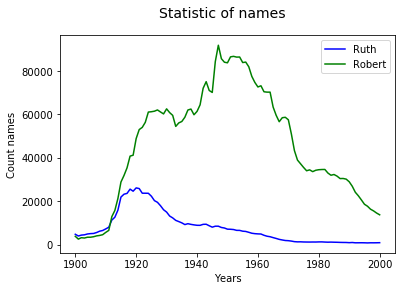

In [7]:
fig = plt.figure()
plt.plot(years, name_count['Ruth'], color='blue', label="Ruth")
plt.plot(years, name_count['Robert'], color='green', label="Robert")
fig.suptitle('Statistic of names', fontsize=14)
plt.xlabel('Years')
plt.ylabel('Count names')
plt.legend()
plt.show()

#### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками

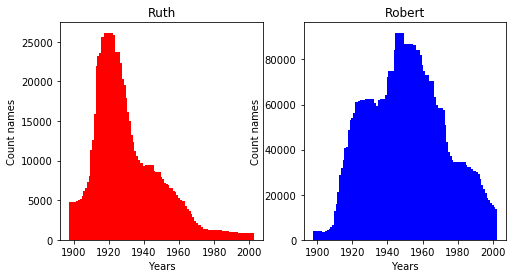

In [8]:
fig, (gist0, gist1) = plt.subplots(ncols=2, figsize=(8, 4))
# Ruth
gist0.bar(years,name_count['Ruth'], 5, facecolor='r')
gist0.set_title('Ruth')
gist0.set_xlabel('Years')
gist0.set_ylabel('Count names')
# Robert
gist1.bar(years,name_count['Robert'], 5, facecolor='b')
gist1.set_title('Robert')
gist1.set_xlabel('Years')
gist1.set_ylabel('Count names')

#### Построить круговую диаграмму по количеству имен, начинающихся на R за 1950 год

In [9]:
# Находит имена на букву R
def begin_on_R(series):
    res = []
    for name in series:
        if name.upper().startswith('R'):
            res.append(True)
        else:
            res.append(False)
    return res

In [10]:
data = names_by_year[1950]
data = data[begin_on_R(data['Name'])]
data = data.groupby('Name').sum().sort_values(by='Count', ascending=False)

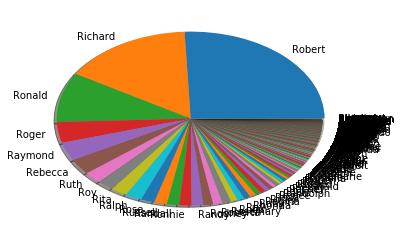

In [11]:
plt.pie(data['Count'], labels=data.index, shadow=True)
plt.show()

#### Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет

In [12]:
# Считает количество согласных букв в слове
def count_consonants(word):
    count_consonants = 0
    # проще перечислить гласные, потом "not in"
    vowels = ['A', 'E', 'I', 'O', 'U', 'Y']
    for letter in word:
        if letter.upper() not in vowels:
            count_consonants += 1
    return count_consonants

In [13]:
# Выбираем столетие и считаем необходимую метрику для него
years = list(range(1900, 2001))
century = pd.concat([data for year, data in names_by_year.items() if year in years])
century = century.groupby('Name').sum()
century["Consonants"] = list(map(count_consonants, century.index))
#century

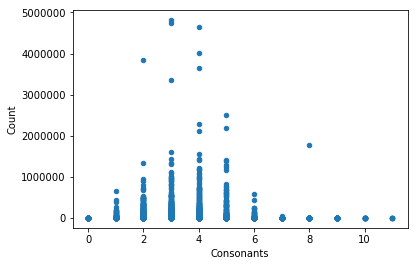

In [14]:
# График "Consonants in century 1900 - 2000"
century.plot.scatter(x='Consonants', y='Count')